In [1]:
#Load libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tysserand import tysserand as ty
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from PIL import Image, ImageOps
import fcsparser

from os import listdir
from os.path import isfile, join
#set up working dir

import sys
sys.path.extend([
    '../tysserand/tysserand',
    '../mosna',
])

import seaborn as sns
from time import time
import copy
from skimage import color
import matplotlib as mpl
import napari

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform

import umap
# if not installed run: conda install -c conda-forge umap-learn
import hdbscan
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from skimage import io

from scipy.stats import ttest_ind    # Welch's t-test
from scipy.stats import mannwhitneyu # Mann-Whitney rank test
from scipy.stats import ks_2samp     # Kolmogorov-Smirnov statistic

sys.path.append("/home/mouneem/mosna/")


from tysserand import tysserand as ty
from mosna import mosna
import glob
import re

2022-03-28 16:45:27.892758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mouneem/Projects/tysserand/spatial-network/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-28 16:45:27.892779: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
img_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/C2v1/'

edg_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/edg/'
coords_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/CRDS/'
nets_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/nets/'


imgs = [f for f in listdir(img_path) if isfile(join(img_path, f))]
coords = [f for f in listdir(coords_path) if isfile(join(coords_path, f))]
edges = [f for f in listdir(edg_path) if isfile(join(edg_path, f))]



In [3]:
print(len(edges))

299


In [ ]:
for fileedg in edges[5:7]:
    print(fileedg)
    filecoords = "coords."+".".join(fileedg.split(".")[1:])
    filenet = ""+".".join(fileedg.split(".")[1:])
    pattern = filenet.split("czi")[0]
    edg = pd.read_csv(edg_path + fileedg , header = None)
    crd = pd.read_csv(coords_path + filecoords , header = None)
    plt.figure(figsize=(30, 30), dpi=80)
    crd=crd.drop([0,1])
    edg=edg.drop([0,1])
    img_found = pattern+"jpg" in imgs
    if img_found:
        img = plt.imread ( img_path + pattern+"jpg")
        fig, ax = ty.showim(img, figsize=(30, 30))
    else:
        fig, ax = plt.subplots(1,1,figsize=(30, 30))
    ax.scatter(crd.iloc[:,1], crd.iloc[:,2], c ="blue")
    Xs = list(edg.iloc[:,1 ])
    Ys = list(edg.iloc[:,1 ])
    print(Xs)

    print(type(edg))
    [x0, y0], [x1, y1] = coords[edg]
    ax.plot([x0, x1], [y0, y1], c=cmap(dist), zorder=0, alpha=alpha_edges, linewidth=linewidth)

    #fig.show()
    fig.savefig(nets_path+filenet+'.png')

    
    

        



           Other         C2          C4         C3         C1
Other  41.998887 -39.594105  -47.388014 -47.335820 -19.744335
C2    -39.594105  40.406575   27.866002  44.376394  -6.140448
C4    -47.388014  27.866002  117.033188  42.679181  -4.132721
C3    -47.335820  44.376394   42.679181  60.800655  -6.352995
C1    -19.744335  -6.140448   -4.132721  -6.352995  88.326987
Assortativity by cell types:
               C4          C2          C3       Other           C1
C4     997.787657 -122.870634  -49.544669 -565.988437  -279.051577
C2    -122.870634  438.949333  284.441912 -341.137000  -225.253966
C3     -49.544669  284.441912  567.753085 -616.333941  -364.044206
Other -565.988437 -341.137000 -616.333941  943.223750  -333.016201
C1    -279.051577 -225.253966 -364.044206 -333.016201  1065.817591
Assortativity by cell types:


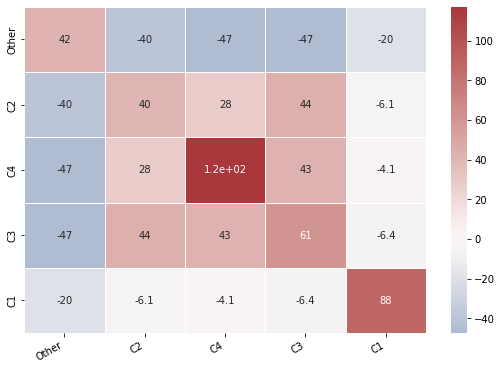

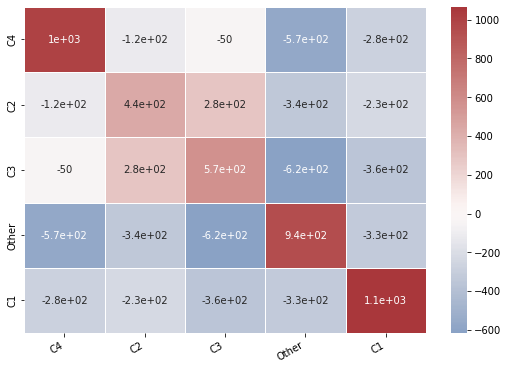

In [5]:
mosna_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/Mixmat/'
mosna_output = str("/home/mouneem/tysserand/CORDELIER_PIERRE/mosna_output/")

mosnas = [f for f in listdir(mosna_path) if isfile(join(mosna_path, f))]
for mosnafile in mosnas[:2]:

    mixmat = pd.read_csv(mosna_path + mosnafile ,index_col=0 )
    print(mixmat)
    title = "Assortativity by cell types:"
    print(title)
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(mixmat, center=0, cmap="vlag", annot=True, linewidths=.5, ax=ax)
    plt.xticks(rotation=30, ha='right');
    # plt.xticks(rotation=30, ha='right', fontsize=20);
    # plt.yticks(fontsize=20);
    plt.savefig(mosna_output + mosnafile+"assortativity.png", bbox_inches='tight', facecolor='white')


In [4]:
mosna_path = '/home/mouneem/tysserand/CORDELIER_PIERRE/Mixmat/'


In [16]:
Layer1 = '/home/mouneem/tysserand/CORDELIER_PIERRE/tummors/'
tummors = [ ".".join(f.split(".")[:-3])  for f in listdir(Layer1) if isfile(join(Layer1, f))]
mosnas = [f for f in listdir(mosna_path) if isfile(join(mosna_path, f))]
mosna_output = str("/home/mouneem/tysserand/CORDELIER_PIERRE/mosna_output/")

print(file)

FullMatrix = MAT

for mosnafile in mosnas:
    file = ".".join(mosnafile.split(".")[1:-4])

    if file in tummors:
        print(file, mosnafile)

        mixmat = pd.read_csv(mosna_path + mosnafile ,index_col=0 )
        print(mixmat)

        keep = np.triu(np.ones(mixmat.shape)).astype('bool').reshape(mixmat.size)
        MAT = pd.DataFrame(mixmat.stack())
        MAT.to_csv('out.csv')

        MAT = pd.read_csv('out.csv')
        MAT.columns = ['X','Y','Value']

        di = {'C1': "Cancer", "C2": 'CD8 T-Cell', 'C3' : 'CD4 T-Cell', 'C4':'B Cell', 'Other':"Other",'C5':'CD3+CD20+' }
        MAT = MAT.replace( {"Y": di })
        MAT = MAT.replace( {"X": di })

        MAT["comb"] = MAT["X"].astype(str) + " / " + MAT["Y"].astype(str)
        
        MAT["Value"]=(MAT["Value"]-MAT["Value"].min())/(MAT["Value"].max()-MAT["Value"].min())

        MAT['sample'] = file
        FullMatrix = FullMatrix.append(pd.DataFrame(data = MAT))


print(FullMatrix)




NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-ImvessC2-4321
NVA_21-003.IMMCORE.C2v1_18T002383-10-Z1-ImvessC2-4321 mixmat_zscore.NVA_21-003.IMMCORE.C2v1_18T002383-10-Z1-ImvessC2-4321.czi_80216_ObjData.fcs.level28187.csv
           Other         C2          C4         C3         C1
Other  41.998887 -39.594105  -47.388014 -47.335820 -19.744335
C2    -39.594105  40.406575   27.866002  44.376394  -6.140448
C4    -47.388014  27.866002  117.033188  42.679181  -4.132721
C3    -47.335820  44.376394   42.679181  60.800655  -6.352995
C1    -19.744335  -6.140448   -4.132721  -6.352995  88.326987
NVA_21-003.IMMCORE.C2v1_16T037314-11-Z2-ImvessC2-4321 mixmat_zscore.NVA_21-003.IMMCORE.C2v1_16T037314-11-Z2-ImvessC2-4321.czi_80107_ObjData.fcs.level12610.csv
               C4          C2          C3       Other           C1
C4     997.787657 -122.870634  -49.544669 -565.988437  -279.051577
C2    -122.870634  438.949333  284.441912 -341.137000  -225.253966
C3     -49.544669  284.441912  567.753085 -616.333941  

         X           Y     Value                 comb  \
0    Other       Other  0.543646        Other / Other   
1    Other  CD8 T-Cell  0.047402   Other / CD8 T-Cell   
2    Other      B Cell  0.000000       Other / B Cell   
3    Other  CD4 T-Cell  0.000317   Other / CD4 T-Cell   
4    Other      Cancer  0.168127       Other / Cancer   
..     ...         ...       ...                  ...   
20  Cancer       Other  0.000000       Cancer / Other   
21  Cancer  CD8 T-Cell  0.000000  Cancer / CD8 T-Cell   
22  Cancer      B Cell  0.000000      Cancer / B Cell   
23  Cancer  CD4 T-Cell  0.000000  Cancer / CD4 T-Cell   
24  Cancer      Cancer       NaN      Cancer / Cancer   

                                               sample  
0   NVA_21-003.IMMCORE.C2v1_18T002383-10-Z1-Imvess...  
1   NVA_21-003.IMMCORE.C2v1_18T002383-10-Z1-Imvess...  
2   NVA_21-003.IMMCORE.C2v1_18T002383-10-Z1-Imvess...  
3   NVA_21-003.IMMCORE.C2v1_18T002383-10-Z1-Imvess...  
4   NVA_21-003.IMMCORE.C2v1_18T0023

                                                    Value  \
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
...                                                   ...   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    0.0   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...    NaN   

                                                                       comb  \
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...            Other / Other   
(NVA_21-003.IMMCORE.C2v1_16T037314-11-Z3-Imvess...       Other / CD8 T-Cell   
(NVA_21-003.IMMCORE.C2v1_16T03

<AxesSubplot:xlabel='comb', ylabel='sample'>

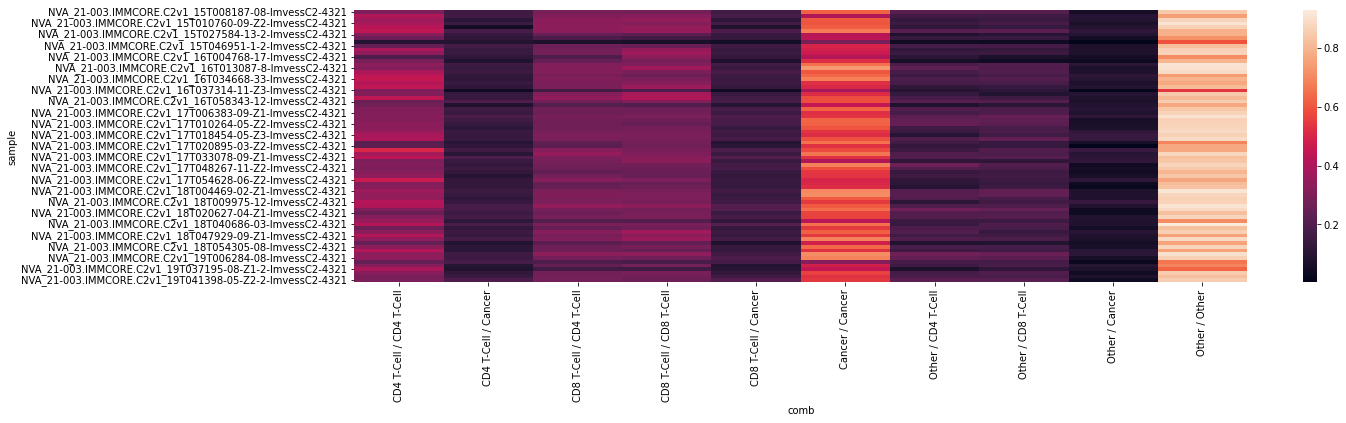

In [21]:
FullMatrix.to_csv('FullMatrix.csv')

FullMatrix = FullMatrix[['Value', 'comb', 'sample']]

FullMatrix2 = FullMatrix[ FullMatrix['comb'].isin(['Other / Other' , 'Other / CD8 T-Cell' , 'Other / CD4 T-Cell', 'Other / Cancer',
                                                    'CD8 T-Cell / CD8 T-Cell' , 'CD8 T-Cell / CD4 T-Cell', 'CD8 T-Cell / Cancer',
                                                    'CD4 T-Cell / CD4 T-Cell', 'CD4 T-Cell / Cancer',
                                                    'Cancer / Cancer', ]) ]

FullMatrix2.index = FullMatrix2[['sample']]
print(FullMatrix2)

Matrix = FullMatrix2.pivot_table(index=["sample"], 
                    columns='comb', 
                    values='Value')


plt.figure(figsize=(20, 5))

sns.heatmap(Matrix)

<Figure size 1440x360 with 0 Axes>

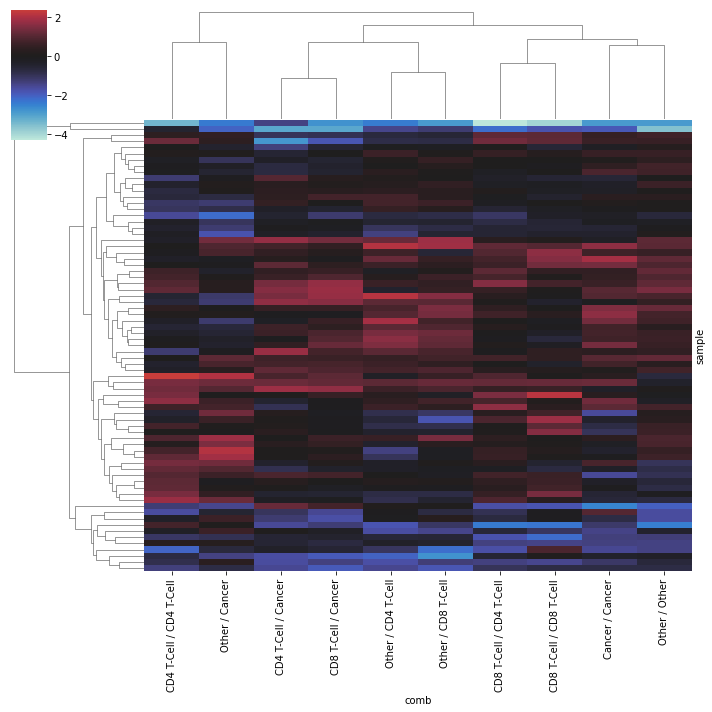

In [22]:
plt.figure(figsize=(20, 5))
sns.clustermap(Matrix, yticklabels=False, center = 0, z_score =1)